# **Importing Libaries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Loading Data**

In [ ]:
data = pd.read_csv('/content/data_for_lr.csv')

In [ ]:
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [ ]:
data.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


In [ ]:
data.isnull().sum()

,0
x,0
y,1


# **Data Preprocessing**

In [ ]:
data.shape

(700, 2)

In [ ]:
data = data.dropna()
print('Shape of the Data :', data.shape)

Shape of the Data : (699, 2)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


# **Splitting Data**

In [ ]:
np.array(data.x[0:500])

array([ 24.,  50.,  15.,  38.,  87.,  36.,  12.,  81.,  25.,   5.,  16.,
        16.,  24.,  39.,  54.,  60.,  26.,  73.,  29.,  31.,  68.,  87.,
        58.,  54.,  84.,  58.,  49.,  20.,  90.,  48.,   4.,  25.,  42.,
         0.,  60.,  93.,  39.,   7.,  21.,  68.,  84.,   0.,  58.,  19.,
        36.,  19.,  59.,  51.,  19.,  33.,  85.,  44.,   5.,  59.,  14.,
         9.,  75.,  69.,  10.,  17.,  58.,  74.,  21.,  51.,  19.,  50.,
        24.,   0.,  12.,  75.,  21.,  64.,   5.,  58.,  32.,  41.,   7.,
         4.,   5.,  49.,  90.,   3.,  11.,  32.,  83.,  25.,  83.,  26.,
        76.,  95.,  53.,  77.,  42.,  25.,  54.,  55.,   0.,  73.,  35.,
        86.,  90.,  13.,  46.,  46.,  32.,   8.,  71.,  28.,  24.,  56.,
        49.,  79.,  90.,  89.,  41.,  27.,  58.,  26.,  31.,  70.,  71.,
        39.,   7.,  48.,  56.,  45.,  41.,   3.,  37.,  24.,  68.,  47.,
        27.,  68.,  74.,  95.,  79.,  21.,  95.,  54.,  56.,  80.,  26.,
        25.,   8.,  95.,  94.,  54.,   7.,  99.,  3

In [ ]:
np.array(data.x[0:500]).shape

(500,)

In [ ]:
# training data input
train_input = np.array(data.x[0:500]).reshape(500,1)

In [ ]:
np.array(data.x[0:500]).reshape(500,1)

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [ ]:
train_output = np.array(data.y[0:500]).reshape(500,1)

In [ ]:
# validation data input and output

test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:699]).reshape(199,1)

In [ ]:
print(f"training data shape = {train_input.shape}")

training data shape = (500, 1)


In [ ]:
print(f"training data output shape = {train_output.shape}")
print(f'testing data input shape = {test_input.shape}')
print(f'testing data output shape = {test_output.shape}')

training data output shape = (500, 1)
testing data input shape = (199, 1)
testing data output shape = (199, 1)


# **<font color = 'green'>Linear Regression</font>**

In [ ]:
# <font color = 'green'>Linear Regression</font>

## **Forward propogation**

**f(x) = m*x + c**

In [ ]:
def forward_propogation(train_input, parameters):
  m = parameters['m']
  c = parameters['c']

  prediction = np.multiply(m, train_input) + c

  return prediction

 ## **Cost Function**

**L = summation(1/2n*(y-f(x))^2)**

In [ ]:
def cost_function(prediction, train_output):

  cost = np.mean((train_output - prediction) ** 2) * 0.5

  return cost

## **Gradiant Descent for Back propogation**

df = summation(f(x) - y)/n

dm = df * x

dc = df * 1


d(cost)/dm = df * df/dm

In [ ]:
def backward_propogation(prediction, train_output, train_input):

  derivatives = dict()

  df = prediction - train_output
  dm = np.mean(np.multiply(df, train_input))
  dc = np.mean(df)

  derivatives['dm'] = dm
  derivatives['dc'] = dc

  return derivatives

## **Update Parameters**

new m = m - (learning_rate * dm)

new c = c - (learning_rate * dc)

In [ ]:
def Update_parameters(parameters, derivatives, learning_rate):
  parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
  parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']

  return parameters


## **Model Traning**

In [ ]:
import matplotlib.axes as ax

In [ ]:
def train(train_input, train_output, learning_rate, iters):

  # random parameters
  parameters = dict()
  parameters['m'] = np.random.uniform(0, 1) * -1
  parameters['c'] = np.random.uniform(0, 1) * -1

  plt.figure()

  # loss
  loss = list()

  # iteration
  for i in range(iters):

    # forward propogation
    prediction = forward_propogation(train_input, parameters)

    # cost
    cost = cost_function(prediction, train_output)

    loss.append(cost)
    print(f'Iteration = {i+1}, Loss = {cost}')

    # plot
    fig, ax = plt.subplots()

    ax.plot(train_input, train_output, '+', label = 'Original')
    ax.plot(train_input, prediction, '+', label = "Training")

    legend = ax.legend()

    plt.plot(train_input, train_output, '+', label = 'Original')
    plt.plot(train_input, prediction, '+', label = 'Training')
    plt.show()

    # back propogation
    derivatives = backward_propogation(train_input, train_output, prediction)

    # update parameter
    parameters = Update_parameters(parameters, derivatives, learning_rate)

  return parameters, loss


## **Training**

Iteration = 1, Loss = 5802.846845017245


<Figure size 640x480 with 0 Axes>

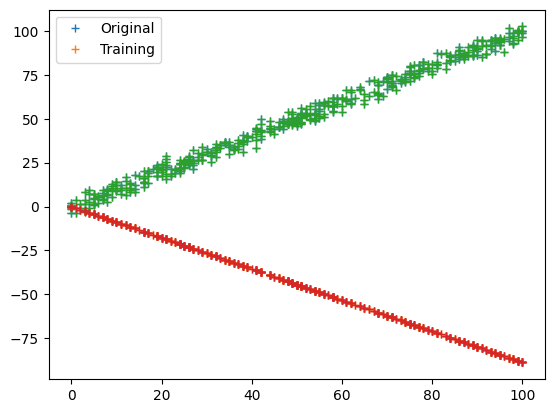

Iteration = 2, Loss = 5798.260536094127


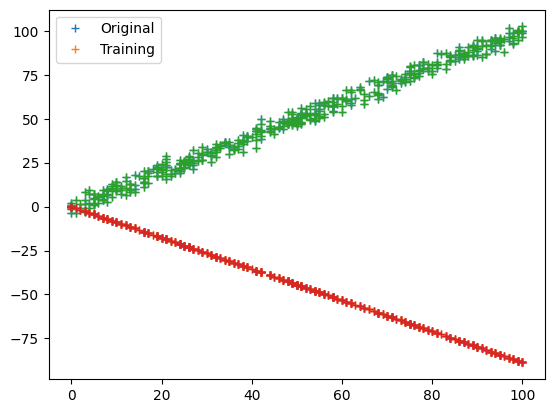

Iteration = 3, Loss = 5793.679891619804


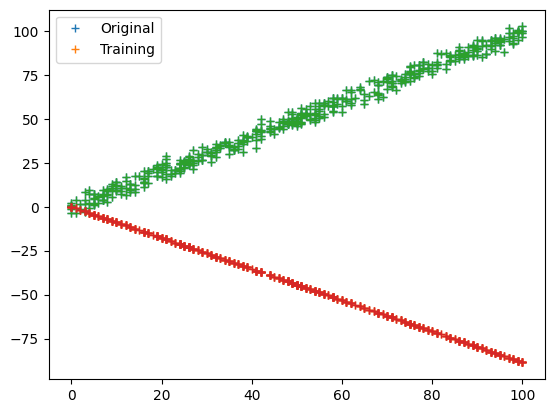

Iteration = 4, Loss = 5789.104903792808


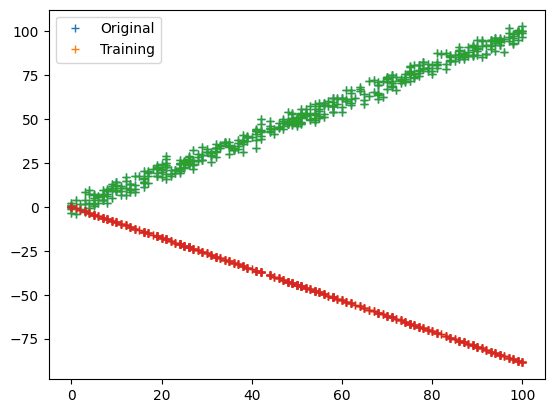

Iteration = 5, Loss = 5784.535564823333


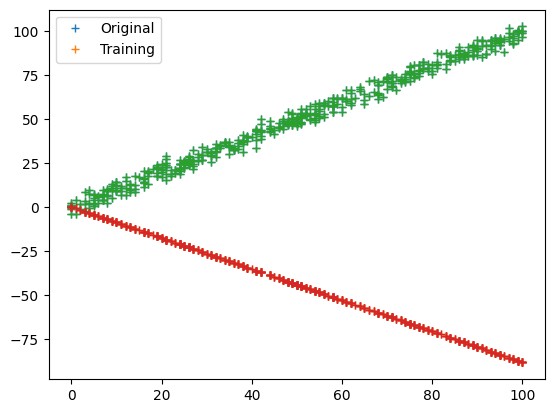

Iteration = 6, Loss = 5779.971866933219


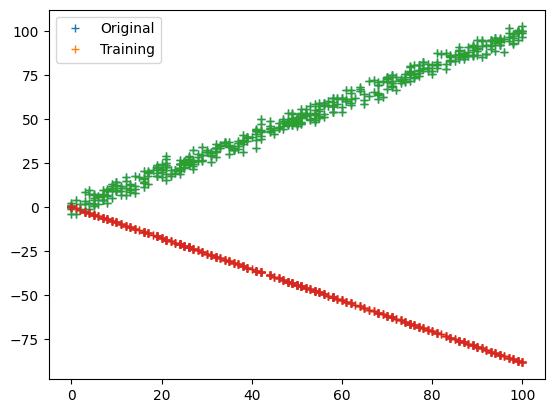

Iteration = 7, Loss = 5775.413802355934


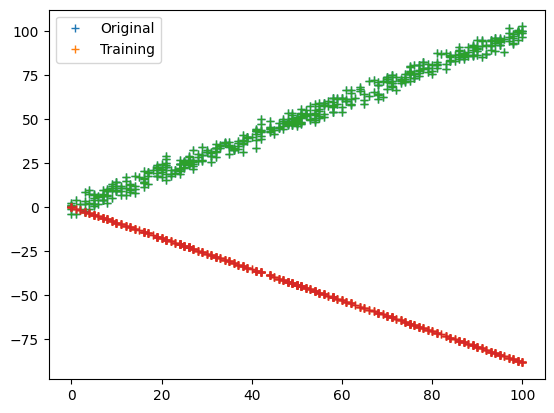

Iteration = 8, Loss = 5770.861363336561


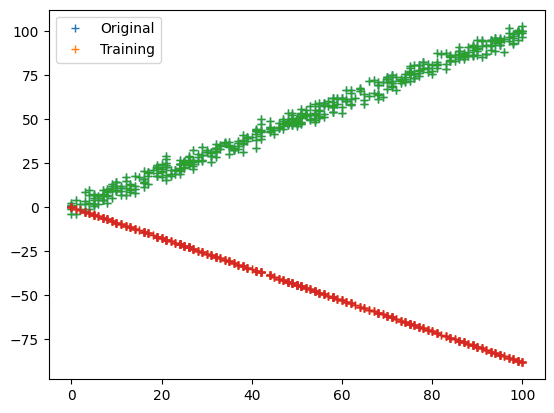

Iteration = 9, Loss = 5766.314542131762


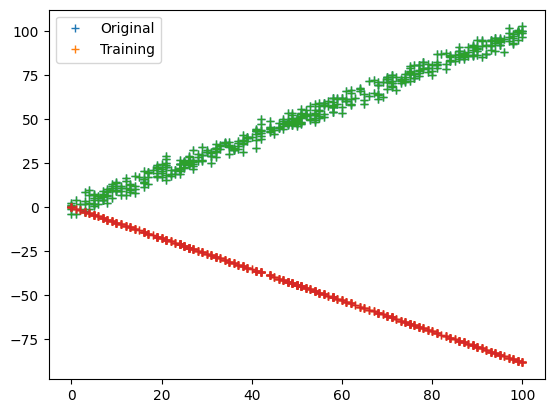

Iteration = 10, Loss = 5761.773331009782


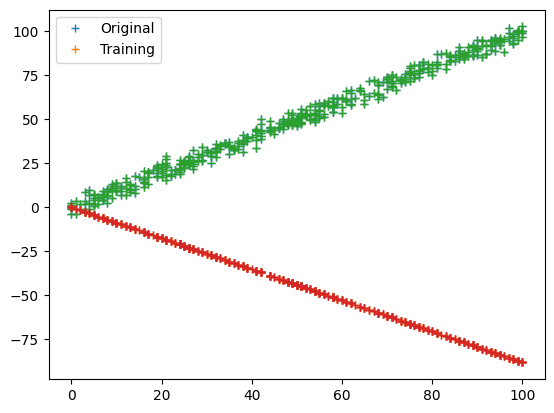

Iteration = 11, Loss = 5757.237722250415


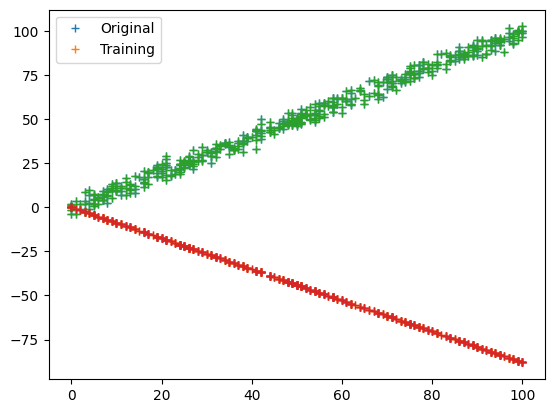

Iteration = 12, Loss = 5752.7077081449925


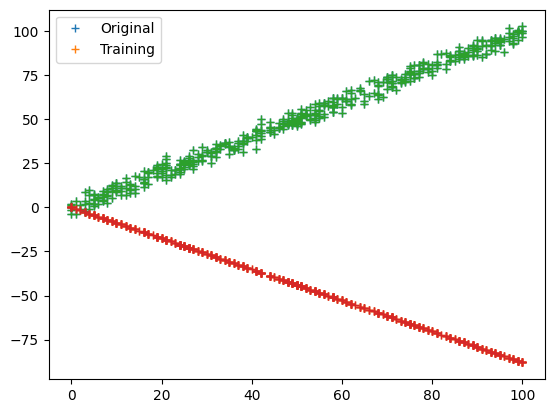

Iteration = 13, Loss = 5748.183280996367


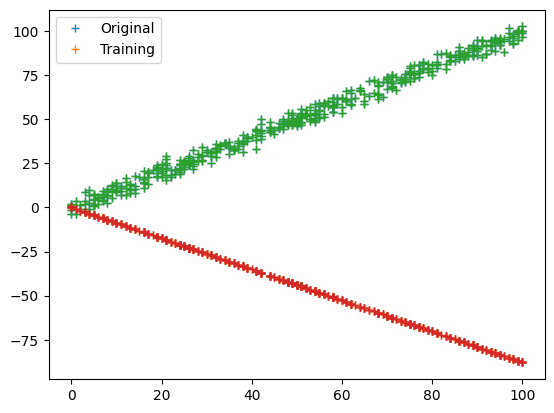

Iteration = 14, Loss = 5743.664433118884


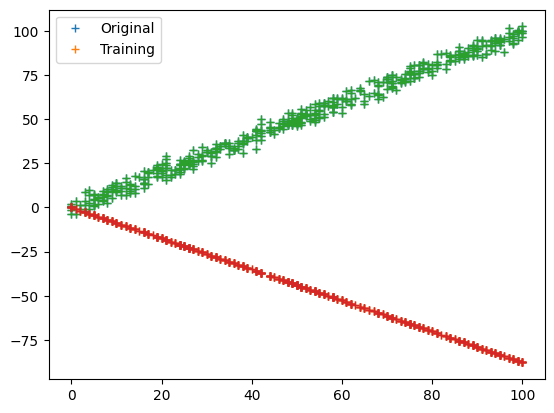

Iteration = 15, Loss = 5739.151156838376


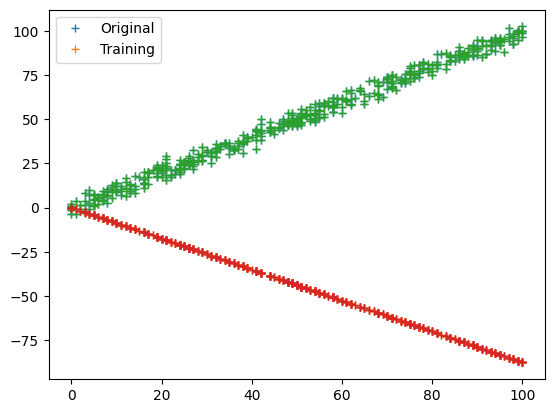

Iteration = 16, Loss = 5734.643444492137


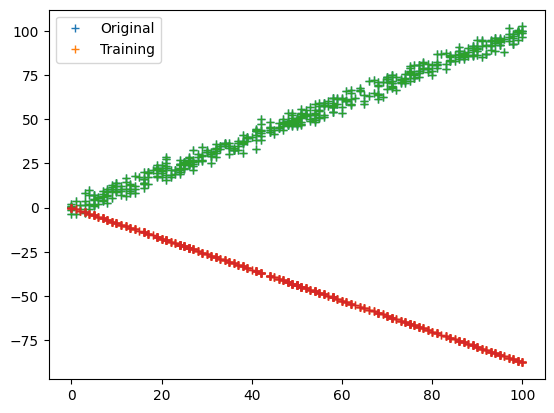

Iteration = 17, Loss = 5730.141288428909


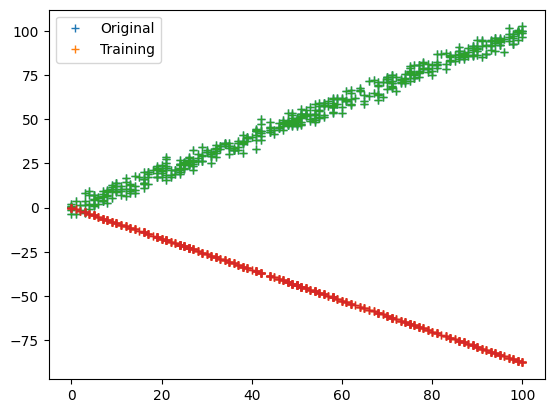

Iteration = 18, Loss = 5725.64468100886


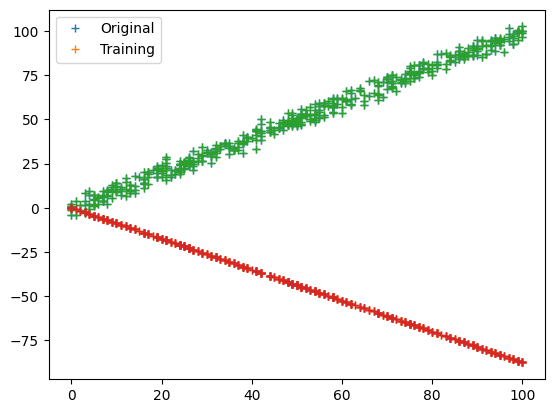

Iteration = 19, Loss = 5721.153614603567


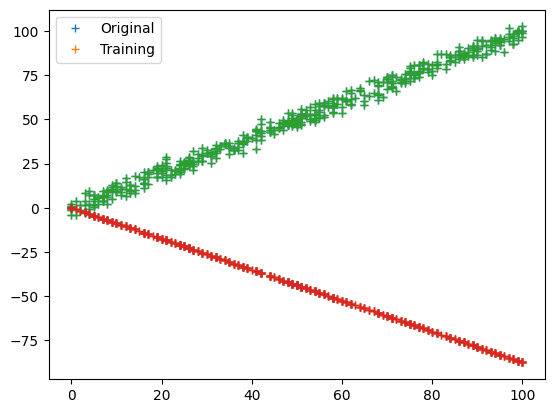

Iteration = 20, Loss = 5716.668081595998


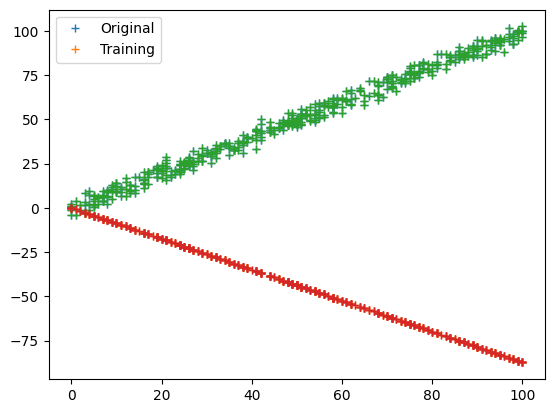

In [ ]:
parameter, loss = train(train_input, train_output, 0.0001, 20)

In [ ]:
print(parameter)

{'m': -0.8726630077451463, 'c': -0.017663358838118662}


In [ ]:
def train(train_input, train_output, learning_rate, iters):

  # random parameters
  parameters = dict()
  parameters['m'] = np.random.uniform(0, 1)
  parameters['c'] = np.random.uniform(0, 1)
  plt.figure()

  # loss
  loss = list()

  # iteration
  for i in range(iters):

    # forward propogation
    prediction = forward_propogation(train_input, parameters)

    # cost
    cost = cost_function(prediction, train_output)

    loss.append(cost)
    print(f'Iteration = {i+1}, Loss = {cost}')

    # plot
    fig, ax = plt.subplots()

    ax.plot(train_input, train_output, '+', label = 'Original')
    ax.plot(train_input, prediction, '+', label = "Training")

    legend = ax.legend()

    plt.plot(train_input, train_output, '+', label = 'Original')
    plt.plot(train_input, prediction, '+', label = 'Training')
    plt.show()

    # back propogation
    derivatives = backward_propogation(train_input, train_output, prediction)

    # update parameter
    parameters = Update_parameters(parameters, derivatives, learning_rate)

  return parameters, loss


Iteration = 1, Loss = 28.947484597620196


<Figure size 640x480 with 0 Axes>

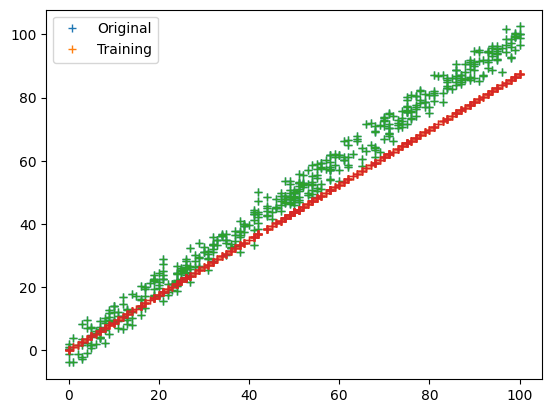

Iteration = 2, Loss = 28.977186846451865


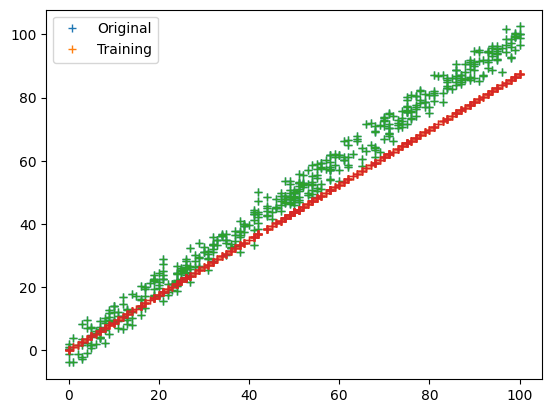

Iteration = 3, Loss = 29.00690421458744


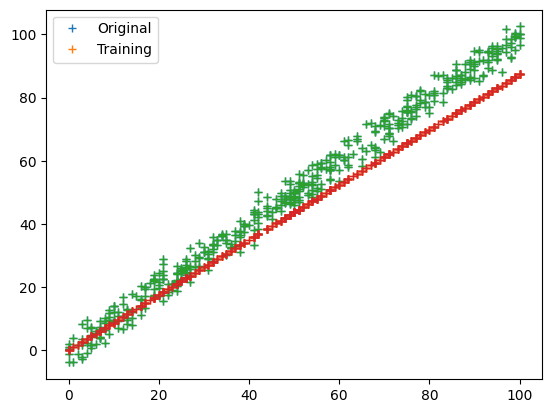

Iteration = 4, Loss = 29.03663669779626


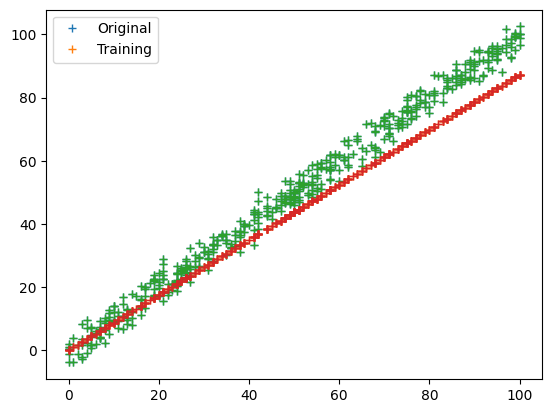

Iteration = 5, Loss = 29.06638429184843


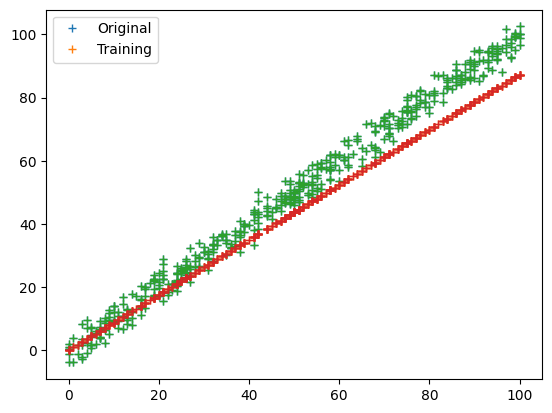

Iteration = 6, Loss = 29.096146992515063


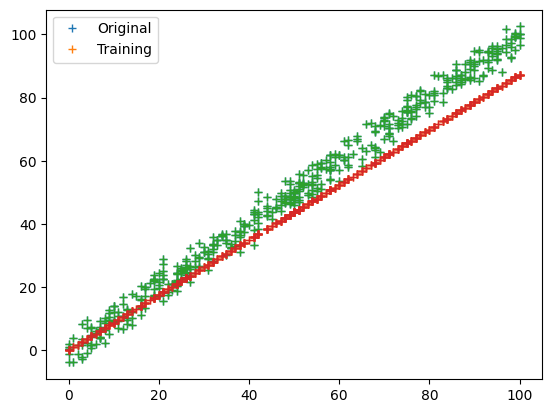

Iteration = 7, Loss = 29.125924795568046


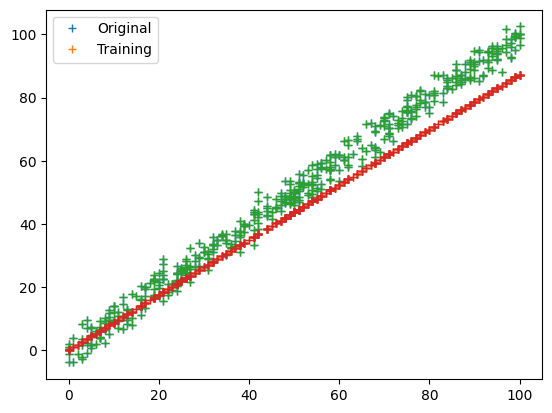

Iteration = 8, Loss = 29.155717696780087


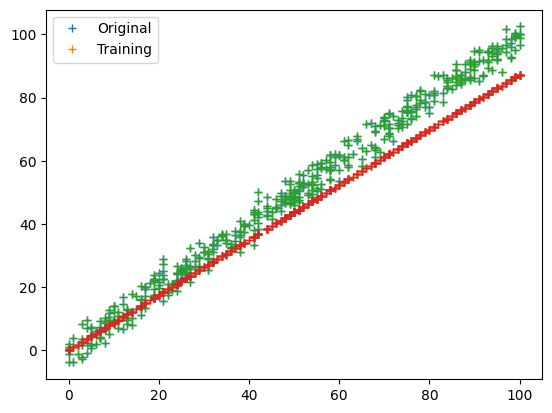

Iteration = 9, Loss = 29.185525691924806


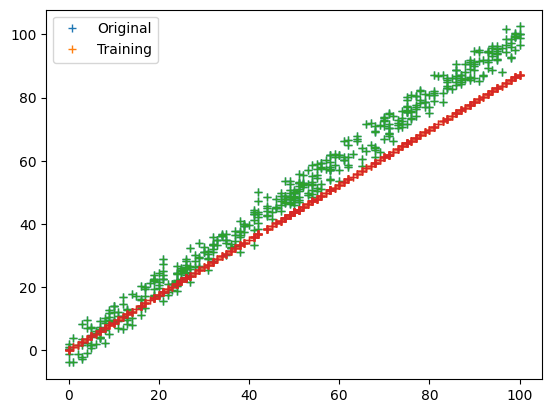

Iteration = 10, Loss = 29.215348776776683


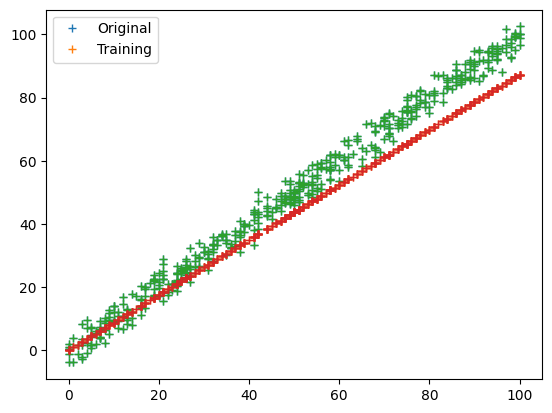

Iteration = 11, Loss = 29.245186947111023


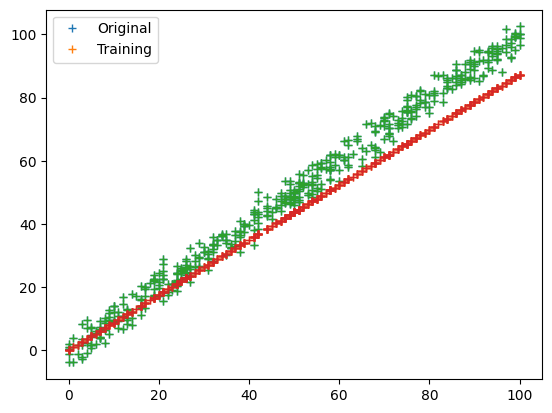

Iteration = 12, Loss = 29.275040198703945


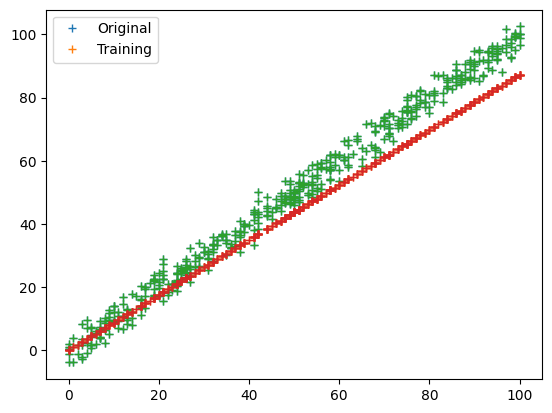

Iteration = 13, Loss = 29.30490852733247


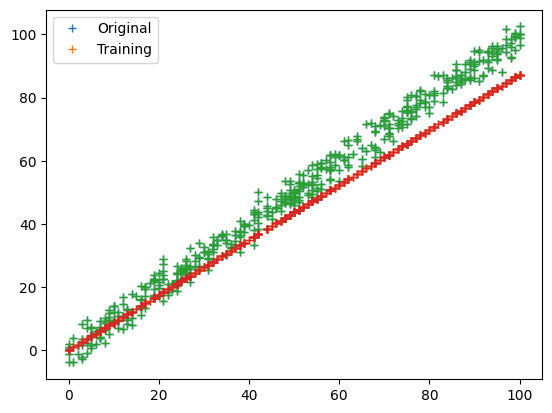

Iteration = 14, Loss = 29.334791928774454


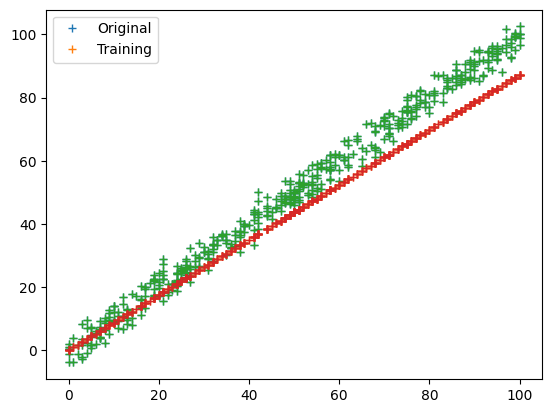

Iteration = 15, Loss = 29.36469039880867


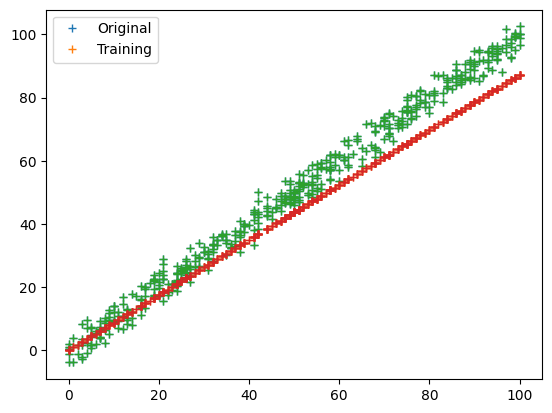

Iteration = 16, Loss = 29.394603933214583


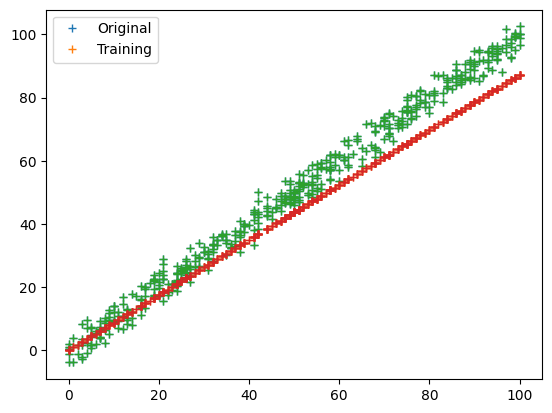

Iteration = 17, Loss = 29.42453252777261


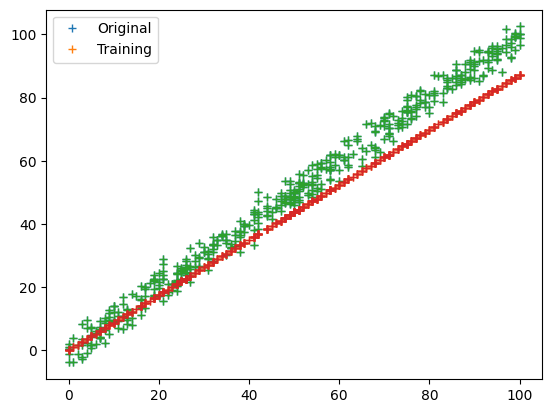

Iteration = 18, Loss = 29.45447617826407


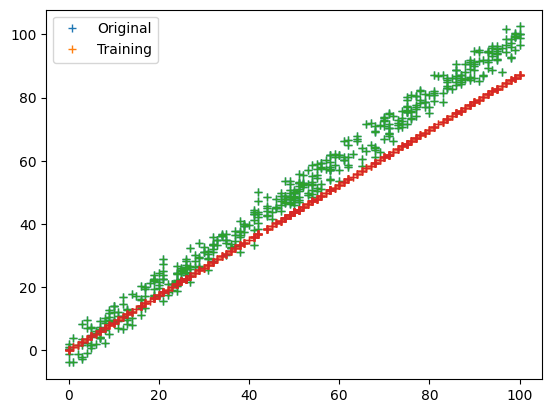

Iteration = 19, Loss = 29.48443488047104


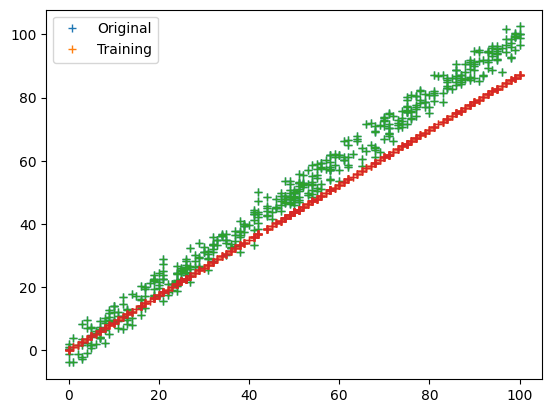

Iteration = 20, Loss = 29.51440863017648


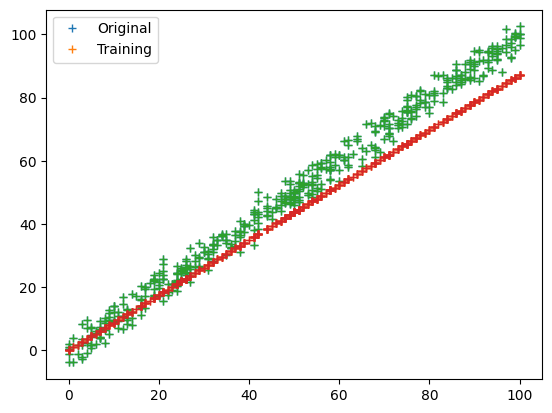

In [ ]:
parameter, loss = train(train_input, train_output, 0.00001, 20)

In [ ]:
print(parameter)

{'m': 0.8707899289010781, 'c': 0.08789576165911178}


In [ ]:
loss

[28.947484597620196,
 28.977186846451865,
 29.00690421458744,
 29.03663669779626,
 29.06638429184843,
 29.096146992515063,
 29.125924795568046,
 29.155717696780087,
 29.185525691924806,
 29.215348776776683,
 29.245186947111023,
 29.275040198703945,
 29.30490852733247,
 29.334791928774454,
 29.36469039880867,
 29.394603933214583,
 29.42453252777261,
 29.45447617826407,
 29.48443488047104,
 29.51440863017648]

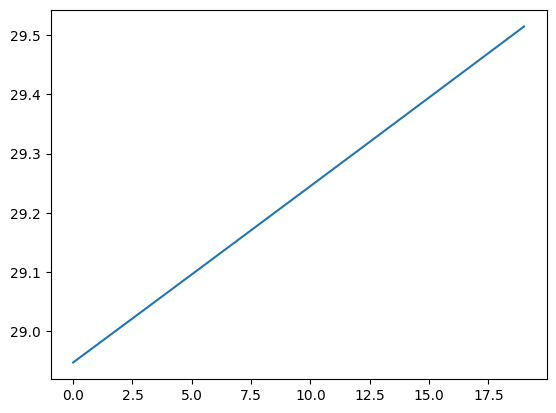

In [ ]:
plt.plot(loss)

## **Predict**

In [ ]:
test_prediction = test_input * parameter['m'] + parameter['c']

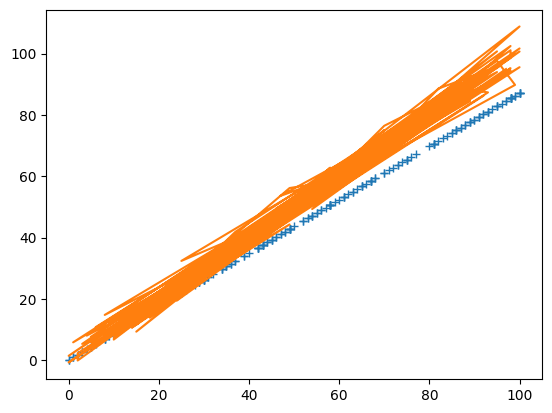

In [ ]:
plt.plot(test_input, test_prediction, '+')
plt.plot(test_input, test_output, '-')
plt.show()

## **Cost of prediction**

In [ ]:
cost_function(test_output, test_prediction)

34.090133380748476